In [2]:
import numpy as np
import matplotlib.pyplot as plot
from math import ceil

In [3]:
full_meta_path = 'full_meta.json' # if file doesn't exist, it will be created
reflacx_dir = "../data/reflacx"
mimic_dir = "../data/mimic/reflacx_imgs"

from metadata import Metadata

metadata = Metadata(reflacx_dir, mimic_dir, full_meta_path)

loading metadata
metadata loaded from file


In [4]:
dicom_id = '0658ad3c-b4f77a56-2ed1609f-ea71a443-d847a975'
reflacx_id = 'P109R167865'

In [5]:
sample = metadata.get_sample(dicom_id, reflacx_id)
sample.data

{'split': 'train',
 'image': '../data/mimic/reflacx_imgs/0658ad3c-b4f77a56-2ed1609f-ea71a443-d847a975.dcm',
 'subject_id': 13855491,
 'image_size_x': 2544,
 'image_size_y': 3056,
 'Airway wall thickening': 0,
 'Atelectasis': 0,
 'Consolidation': 0,
 'Emphysema': 0,
 'Enlarged cardiac silhouette': 0,
 'Fibrosis': 0,
 'Fracture': 0,
 'Groundglass opacity': 0,
 'Mass': 0,
 'Nodule': 0,
 'Other': nan,
 'Pleural effusion': 0,
 'Pleural thickening': 0,
 'Pneumothorax': 0,
 'Pulmonary edema': 0,
 'Quality issue': False,
 'Support devices': False,
 'Wide mediastinum': 1,
 'fixations': '../data/reflacx/main_data/P109R167865/fixations.csv',
 'transcription': '../data/reflacx/main_data/P109R167865/transcription.txt',
 'anomaly_location_ellipses': '../data/reflacx/main_data/P109R167865/anomaly_location_ellipses.csv',
 'chest_bounding_box': '../data/reflacx/main_data/P109R167865/chest_bounding_box.csv',
 'timestamps_transcription': '../data/reflacx/main_data/P109R167865/timestamps_transcription.csv

In [13]:
maxf = -1
minf = -1
s = 0
count = 0
for did in metadata.list_dicom_ids():
    for rid in metadata.list_reflacx_ids(did):
        sample = metadata.get_sample(did, rid)
        if 'fixations' in sample.data:
            fixations = len(sample.get_fixations())
            count += 1
            s += fixations
            if maxf == -1:
                maxf = fixations
                minf = fixations
            elif fixations > maxf:
                maxf = fixations
            elif fixations < minf:
                minf = fixations

print("max fixations per exam: {}\nmin fixations per exam: {}\navg fixations per exam: {:.2f}".format(maxf, minf, s / count))

max fixations per exam: 391
min fixations per exam: 17
avg fixations per exam: 105.05


In [5]:
[s['sentence'] for s in sentences]

['_pre_transcript',
 'the ascending aorta may be slightly dilated',
 'the heart is normal in size',
 'no parenchymal or pleural space abnormality is present',
 'no acute osseous abnormalities present',
 '_post_transcript']

In [6]:
fbs = sample.draw_fixations_by_sentence()


In [7]:
fbs.keys()

dict_keys(['_pre_transcript', 'the ascending aorta may be slightly dilated', 'the heart is normal in size', 'no parenchymal or pleural space abnormality is present', 'no acute osseous abnormalities present', '_post_transcript'])

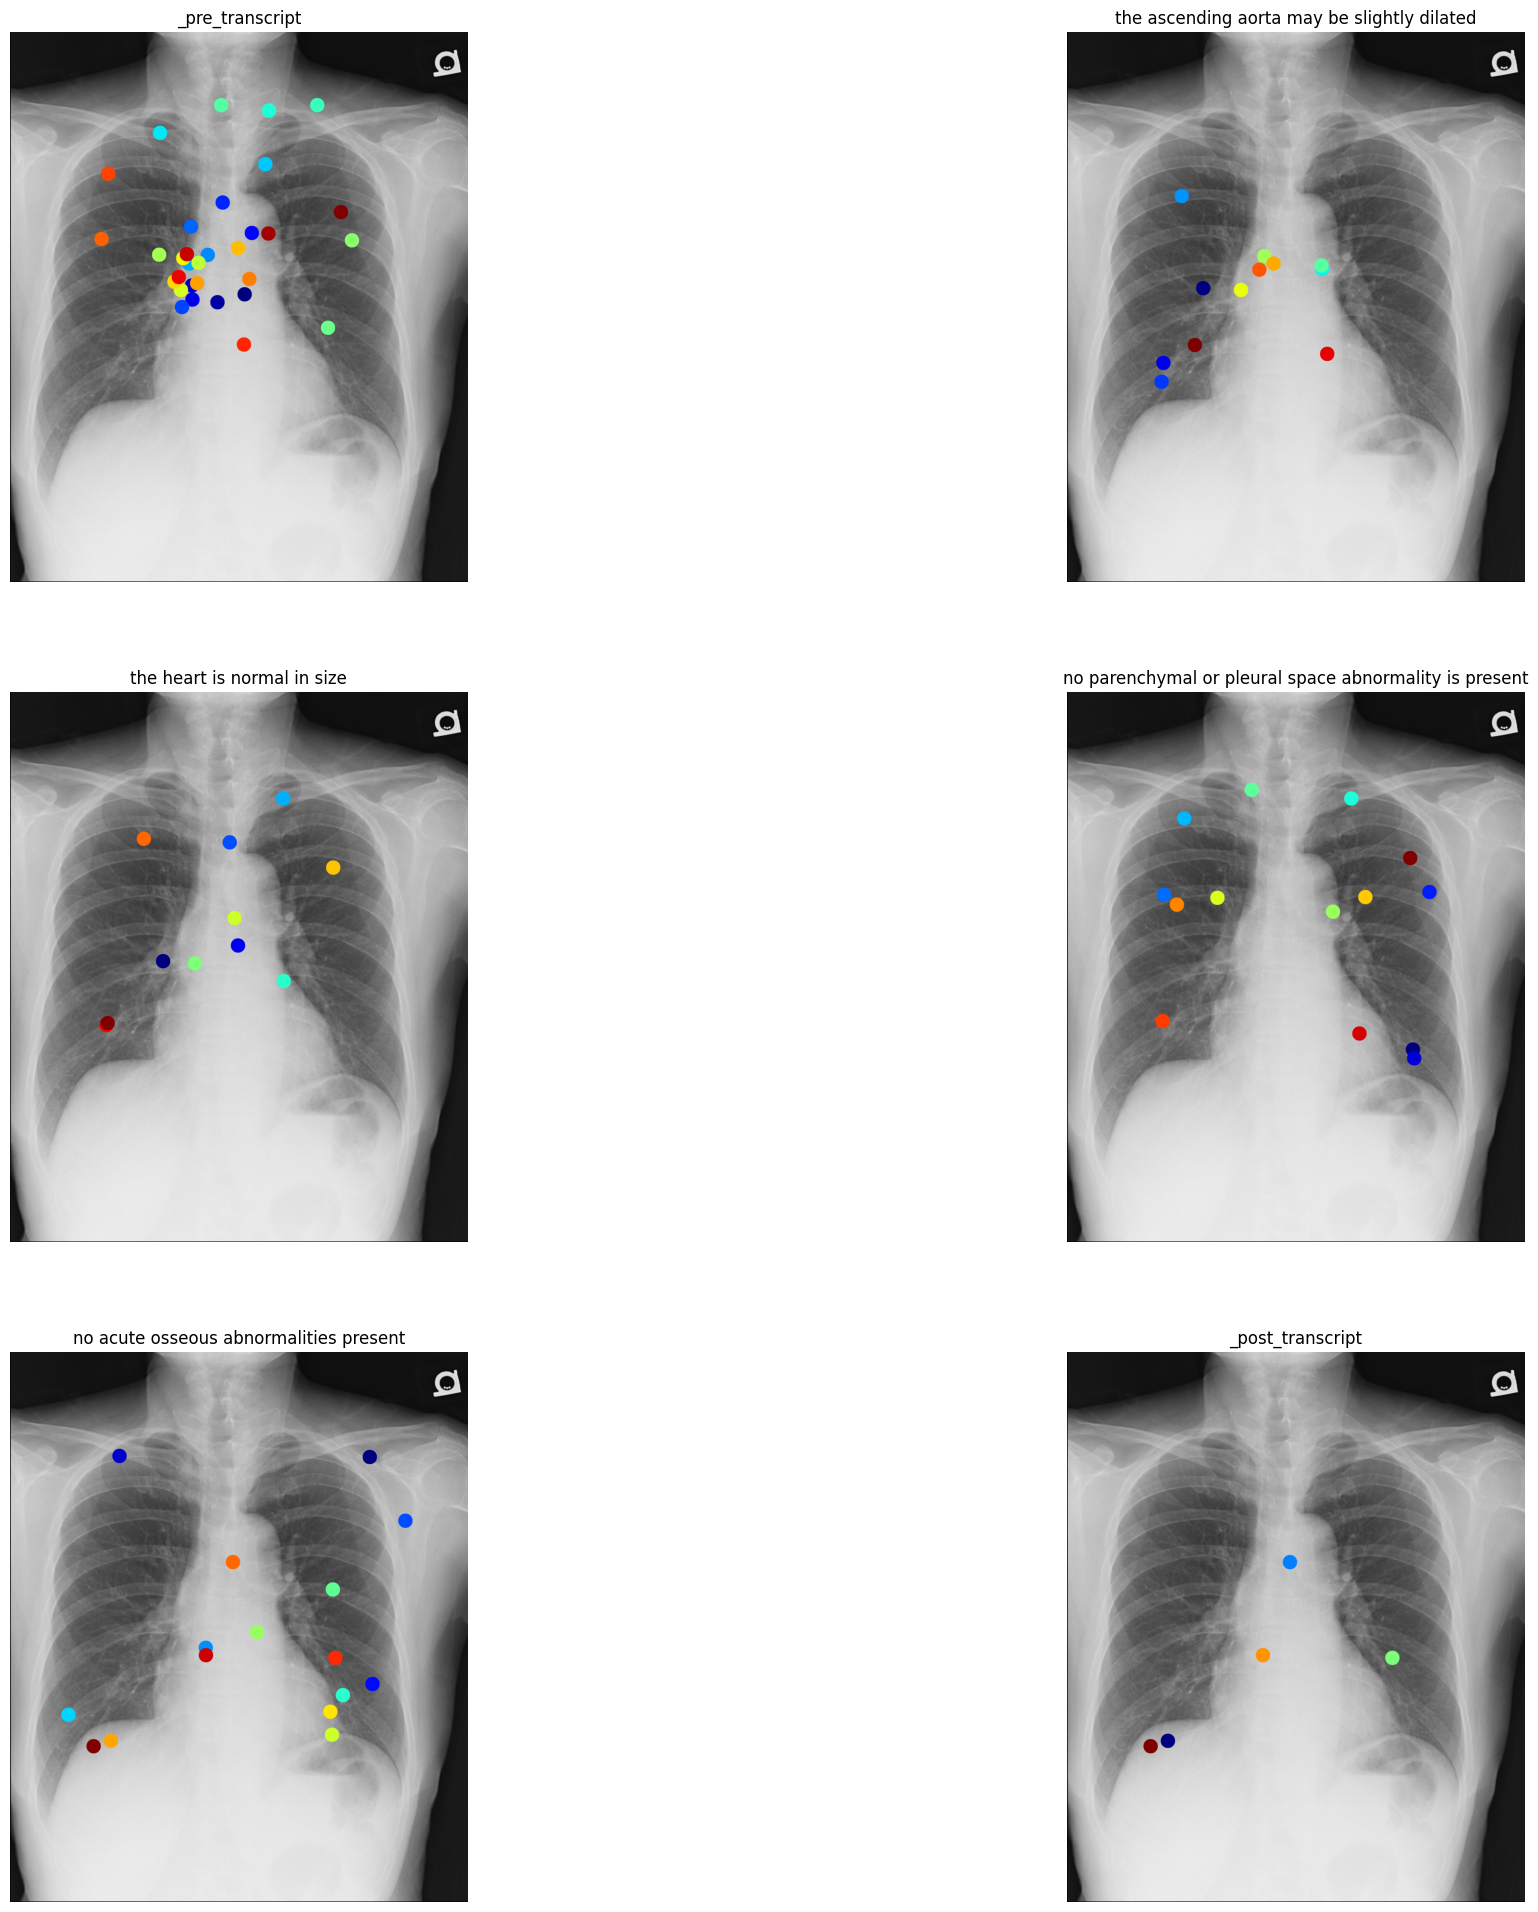

In [8]:

f = plot.figure(figsize=(25, 50))

for i, sentence in enumerate(fbs, start=1):
    sp = f.add_subplot(6, 2, i)
    sp.title.set_text(sentence)
    plot.axis('off')
    plot.imshow(fbs[sentence])

In [9]:
xray = sample.get_dicom_img()

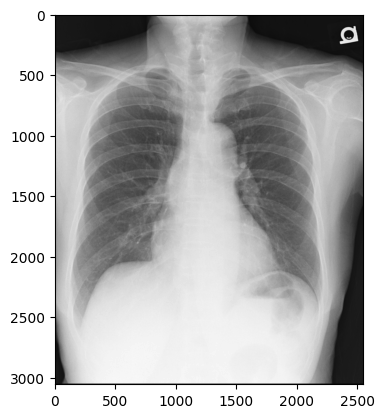

In [10]:
plot.imshow(xray, cmap='gray')

In [11]:
sentences[1].keys()

dict_keys(['start_t', 'end_t', 'sentence', 'fixations'])

In [12]:
fixations = sentences[1]['fixations']
fixations[0]

{'timestamp_start_fixation': 8.303,
 'timestamp_end_fixation': 8.516,
 'x_position': 756.0,
 'y_position': 1423.0,
 'pupil_area_normalized': 0.735,
 'angular_resolution_x_pixels_per_degree': 131.0,
 'angular_resolution_y_pixels_per_degree': 129.0,
 'window_width': 1.0002,
 'window_level': 0.50012,
 'xmin_shown_from_image': 0.0,
 'ymin_shown_from_image': 0.0,
 'xmax_shown_from_image': 2544.0,
 'ymax_shown_from_image': 3056.0,
 'xmin_in_screen_coordinates': 1021.0,
 'ymin_in_screen_coordinates': 0.0,
 'xmax_in_screen_coordinates': 2819.0,
 'ymax_in_screen_coordinates': 2160.0}

In [10]:
fixations_by_sentence = sample.draw_fixations_by_sentence()
for sentence in list(fixations_by_sentence.keys())[1:-1]:
    print(sentence)



the ascending aorta may be slightly dilated
the heart is normal in size
no parenchymal or pleural space abnormality is present
no acute osseous abnormalities present


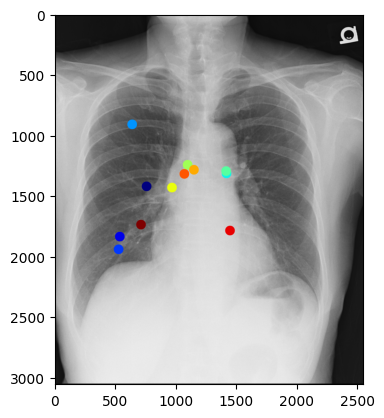

In [62]:
img = fixations_by_sentence['the ascending aorta may be slightly dilated']
plot.imshow(img)

In [45]:
import cv2

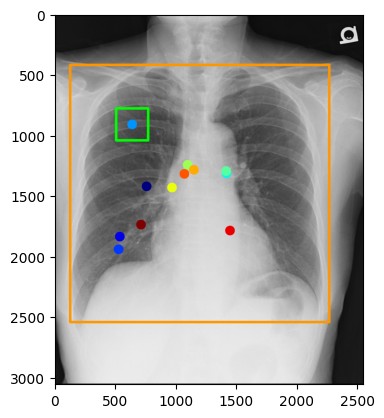

In [64]:
img2 = cv2.rectangle(img, (125, 420), (2265, 2544), (255, 150, 0), 20)
img2 = cv2.rectangle(img, (505, 779), (769, 1043), (0, 255, 0), 20)
plot.imshow(img2)

In [43]:
sample.get_chest_bounding_box(), fixations[3]

({'xmin': 125, 'ymin': 420, 'xmax': 2265, 'ymax': 2544},
 {'timestamp_start_fixation': 8.825,
  'timestamp_end_fixation': 9.11,
  'x_position': 637.0,
  'y_position': 911.0,
  'pupil_area_normalized': 0.765,
  'angular_resolution_x_pixels_per_degree': 132.0,
  'angular_resolution_y_pixels_per_degree': 132.0,
  'window_width': 1.0002,
  'window_level': 0.50012,
  'xmin_shown_from_image': 0.0,
  'ymin_shown_from_image': 0.0,
  'xmax_shown_from_image': 2544.0,
  'ymax_shown_from_image': 3056.0,
  'xmin_in_screen_coordinates': 1021.0,
  'ymin_in_screen_coordinates': 0.0,
  'xmax_in_screen_coordinates': 2819.0,
  'ymax_in_screen_coordinates': 2160.0})

In [55]:
n = get_fixation_node(fixations[3], chest_bb)
print('duration: {:.2f}'.format(n.duration))
print('norm_x: {:.2f}'.format(n.norm_x))
print('norm_y: {:.2f}'.format(n.norm_y))
print('viewed_x_min: {}'.format(n.viewed_x_min))
print('viewed_x_max: {}'.format(n.viewed_x_max))
print('viewed_y_min: {}'.format(n.viewed_y_min))
print('viewed_y_max: {}'.format(n.viewed_y_max))

duration: 0.29
norm_x: 0.24
norm_y: 0.23
viewed_x_min: 505
viewed_x_max: 769
viewed_y_min: 779
viewed_y_max: 1043


### Attempting to structure fixations as a graph

In [24]:
from pyvis.network import Network
import networkx as nx

In [17]:
f = fixations[0]
f

{'timestamp_start_fixation': 8.303,
 'timestamp_end_fixation': 8.516,
 'x_position': 756.0,
 'y_position': 1423.0,
 'pupil_area_normalized': 0.735,
 'angular_resolution_x_pixels_per_degree': 131.0,
 'angular_resolution_y_pixels_per_degree': 129.0,
 'window_width': 1.0002,
 'window_level': 0.50012,
 'xmin_shown_from_image': 0.0,
 'ymin_shown_from_image': 0.0,
 'xmax_shown_from_image': 2544.0,
 'ymax_shown_from_image': 3056.0,
 'xmin_in_screen_coordinates': 1021.0,
 'ymin_in_screen_coordinates': 0.0,
 'xmax_in_screen_coordinates': 2819.0,
 'ymax_in_screen_coordinates': 2160.0}

In [18]:
[{'w': f['xmax_shown_from_image'] - f['xmin_shown_from_image'],
  'h': f['ymax_shown_from_image'] - f['ymin_shown_from_image']}
  for f in fixations]

[{'w': 2544.0, 'h': 3056.0},
 {'w': 2544.0, 'h': 3056.0},
 {'w': 2544.0, 'h': 3056.0},
 {'w': 2544.0, 'h': 3056.0},
 {'w': 2544.0, 'h': 3056.0},
 {'w': 2544.0, 'h': 3056.0},
 {'w': 2544.0, 'h': 3056.0},
 {'w': 2544.0, 'h': 3056.0},
 {'w': 2544.0, 'h': 3056.0},
 {'w': 2544.0, 'h': 3056.0},
 {'w': 2544.0, 'h': 3056.0},
 {'w': 2544.0, 'h': 3056.0}]

In [19]:
g = Network(notebook=True, cdn_resources='remote', directed=True)
g.toggle_physics(False)

for i, node in enumerate(fixations, start=1):
    g.add_node(i,
              label=i,
              title=str(i),
              value=node['timestamp_end_fixation'] - node['timestamp_start_fixation'],
              x=node['x_position'],
              y=node['y_position'],
              color='green' if i == 1 else 'cyan' if i == len(fixations) else "#97c2fc")


scan order edges

In [20]:
for i in range(1, len(g.node_ids)):
    g.add_edge(g.node_ids[i - 1], g.node_ids[i], width=10, color='purple')

euclidean edges

In [21]:
for i, head in enumerate(g.nodes):
    for j, tail in enumerate(g.nodes):
        if i == j:
            continue
        g.add_edge(head['id'],
                   tail['id'],
                   weight=((head['x'] - tail['x']) ** 2 + (head['y'] - tail['y']) ** 2) ** 0.5,
                   color='0x00cccc',
                   hidden=True)

hierarchical (zoom) edges

In [22]:
g.save_graph('example.html')

In [ ]:
g = Network(notebook=True, cdn_resources='remote')
nxg = nx.complete_graph(5)
g.from_nx(nxg)
g.show("example.html")

### Getting relevant info from sample

In [24]:
sample = metadata.get_sample(dicom_id, reflacx_id)

In [25]:
sentences = sample.get_timed_sentences()
sentences[1]

{'start_t': 8.1,
 'end_t': 10.97,
 'sentence': 'the ascending aorta may be slightly dilated',
 'fixations': [{'timestamp_start_fixation': 8.303,
   'timestamp_end_fixation': 8.516,
   'x_position': 756.0,
   'y_position': 1423.0,
   'pupil_area_normalized': 0.735,
   'angular_resolution_x_pixels_per_degree': 131.0,
   'angular_resolution_y_pixels_per_degree': 129.0,
   'window_width': 1.0002,
   'window_level': 0.50012,
   'xmin_shown_from_image': 0.0,
   'ymin_shown_from_image': 0.0,
   'xmax_shown_from_image': 2544.0,
   'ymax_shown_from_image': 3056.0,
   'xmin_in_screen_coordinates': 1021.0,
   'ymin_in_screen_coordinates': 0.0,
   'xmax_in_screen_coordinates': 2819.0,
   'ymax_in_screen_coordinates': 2160.0},
  {'timestamp_start_fixation': 8.562,
   'timestamp_end_fixation': 8.595,
   'x_position': 535.0,
   'y_position': 1838.0,
   'pupil_area_normalized': 0.736,
   'angular_resolution_x_pixels_per_degree': 132.0,
   'angular_resolution_y_pixels_per_degree': 129.0,
   'window_wid

In [26]:
chest = sample.get_chest_bounding_box()
xmin = chest['xmin']
ymin = chest['ymin']
xmax = chest['xmax']
ymax = chest['ymax']
xmin, ymin, xmax, ymax

(125, 420, 2265, 2544)

In [27]:
fixation = sentences[1]['fixations'][0]
fixation

{'timestamp_start_fixation': 8.303,
 'timestamp_end_fixation': 8.516,
 'x_position': 756.0,
 'y_position': 1423.0,
 'pupil_area_normalized': 0.735,
 'angular_resolution_x_pixels_per_degree': 131.0,
 'angular_resolution_y_pixels_per_degree': 129.0,
 'window_width': 1.0002,
 'window_level': 0.50012,
 'xmin_shown_from_image': 0.0,
 'ymin_shown_from_image': 0.0,
 'xmax_shown_from_image': 2544.0,
 'ymax_shown_from_image': 3056.0,
 'xmin_in_screen_coordinates': 1021.0,
 'ymin_in_screen_coordinates': 0.0,
 'xmax_in_screen_coordinates': 2819.0,
 'ymax_in_screen_coordinates': 2160.0}

In [28]:
duration = fixation['timestamp_end_fixation'] - fixation['timestamp_start_fixation']
norm_x = (fixation['x_position'] - xmin) / (xmax - xmin)
norm_y = (fixation['y_position'] - ymin) / (ymax - ymin)
norm_x,

(0.29485981308411213,)

### getting underlying crop, using angular resolution

In [29]:
xray.shape

(3056, 2544)

In [30]:
# assuming 1 degree of fov and doubling it for margin
viewed_x_min = int(max(0, fixation['x_position'] - fixation['angular_resolution_x_pixels_per_degree']))
viewed_x_max = int(min(xray.shape[1], fixation['x_position'] + fixation['angular_resolution_x_pixels_per_degree']))
viewed_y_min = int(max(0, fixation['y_position'] - fixation['angular_resolution_y_pixels_per_degree']))
viewed_y_max = int(min(xray.shape[0], fixation['y_position'] + fixation['angular_resolution_y_pixels_per_degree']))

viewed_x_min, viewed_x_max, viewed_y_min, viewed_y_max


(625, 887, 1294, 1552)

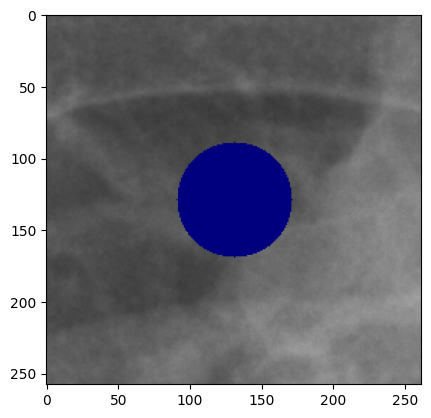

In [31]:
plot.imshow(fixations_by_sentence['the ascending aorta may be slightly dilated'][1294:1552, 625:887])

consolidating into function

In [12]:
class FixationNode:
    def __init__(self,
                 duration,
                 norm_x,
                 norm_y,
                 viewed_x_min,
                 viewed_x_max,
                 viewed_y_min,
                 viewed_y_max):
        self.duration = duration
        self.norm_x = norm_x
        self.norm_y = norm_y
        self.viewed_x_min = viewed_x_min
        self.viewed_x_max = viewed_x_max
        self.viewed_y_min = viewed_y_min
        self.viewed_y_max = viewed_y_max
        

In [33]:
def get_fixation_node(fixation, chest_bb, std_devs=1):
    duration = fixation['timestamp_end_fixation'] - fixation['timestamp_start_fixation']
    norm_x = (fixation['x_position'] - chest_bb['xmin']) / (chest_bb['xmax'] - chest_bb['xmin'])
    norm_y = (fixation['y_position'] - chest_bb['ymin']) / (chest_bb['ymax'] - chest_bb['ymin'])

    if norm_x < 0 or norm_x > 1 or norm_y < 0 or norm_y > 1:
        return None

    ang_x = fixation['angular_resolution_x_pixels_per_degree']
    ang_y = fixation['angular_resolution_y_pixels_per_degree']

    viewed_x_min = int(max(0, fixation['x_position'] - ang_x * std_devs))
    viewed_x_max = int(min(xray.shape[1], fixation['x_position'] + ang_x * std_devs))
    viewed_y_min = int(max(0, fixation['y_position'] - ang_y * std_devs))
    viewed_y_max = int(min(xray.shape[0], fixation['y_position'] + ang_y * std_devs))

    return FixationNode(duration,
                        norm_x,
                        norm_y,
                        viewed_x_min,
                        viewed_x_max,
                        viewed_y_min,
                        viewed_y_max
                       )
    
     

In [8]:
d = {}
for did in metadata.list_dicom_ids():
    for rid in metadata.list_reflacx_ids(did):
        sample = metadata.get_sample(did, rid)
        for k in sample.data.keys():
            if k not in d:
                d[k] = 0
            d[k] += 1

d

{'split': 3052,
 'image': 3052,
 'subject_id': 3052,
 'image_size_x': 3052,
 'image_size_y': 3052,
 'Airway wall thickening': 295,
 'Atelectasis': 3052,
 'Consolidation': 3052,
 'Emphysema': 295,
 'Enlarged cardiac silhouette': 3052,
 'Fibrosis': 295,
 'Fracture': 295,
 'Groundglass opacity': 3052,
 'Mass': 295,
 'Nodule': 295,
 'Other': 3052,
 'Pleural effusion': 295,
 'Pleural thickening': 295,
 'Pneumothorax': 3052,
 'Pulmonary edema': 3052,
 'Quality issue': 295,
 'Support devices': 3052,
 'Wide mediastinum': 295,
 'fixations': 3032,
 'transcription': 3032,
 'anomaly_location_ellipses': 3052,
 'chest_bounding_box': 3052,
 'timestamps_transcription': 3032,
 'heatmaps': 3032,
 'Abnormal mediastinal contour': 2757,
 'Acute fracture': 2757,
 'Enlarged hilum': 2757,
 'Hiatal hernia': 2757,
 'High lung volume / emphysema': 2757,
 'Interstitial lung disease': 2757,
 'Lung nodule or mass': 2757,
 'Pleural abnormality': 2757}

In [10]:
sample.get_fixations()

[{'timestamp_start_fixation': 0.057,
  'timestamp_end_fixation': 0.203,
  'x_position': 1597.0,
  'y_position': 1267.0,
  'pupil_area_normalized': 1.008,
  'angular_resolution_x_pixels_per_degree': 94.0,
  'angular_resolution_y_pixels_per_degree': 94.0,
  'window_width': 1.0002,
  'window_level': 0.50012,
  'xmin_shown_from_image': 0.0,
  'ymin_shown_from_image': 0.0,
  'xmax_shown_from_image': 2532.0,
  'ymax_shown_from_image': 2539.0,
  'xmin_in_screen_coordinates': 843.0,
  'ymin_in_screen_coordinates': 0.0,
  'xmax_in_screen_coordinates': 2997.0,
  'ymax_in_screen_coordinates': 2160.0},
 {'timestamp_start_fixation': 0.253,
  'timestamp_end_fixation': 0.855,
  'x_position': 1107.0,
  'y_position': 1133.0,
  'pupil_area_normalized': 0.979,
  'angular_resolution_x_pixels_per_degree': 94.0,
  'angular_resolution_y_pixels_per_degree': 94.0,
  'window_width': 1.0002,
  'window_level': 0.50012,
  'xmin_shown_from_image': 0.0,
  'ymin_shown_from_image': 0.0,
  'xmax_shown_from_image': 2532

In [46]:
class ScanPathGraph:
    def __init__(self, calc_edge, reflacx_sample=None, dicom_id=None, reflacx_id=None, metadata=None, std_devs=1):
        if reflacx_sample is None:
            reflacx_sample = metadata.get_sample(dicom_id, reflacx_id)
        self.dicom_id = dicom_id
        self.reflacx_id = reflacx_id
        self.xray = sample.get_dicom_img()
        self.chest_bb = sample.get_chest_bounding_box()

        self.phase1_labels = {reflacx_sample.data[k] 
                              for k in ["Airway wall thickening",
                                        "Atelectasis",
                                        "Consolidation",
                                        "Emphysema",
                                        "Enlarged cardiac silhouette",
                                        "Fibrosis",
                                        "Fracture",
                                        "Groundglass opacity",
                                        "Mass",
                                        "Nodule",
                                        "Pleural effusion",
                                        "Pleural thickening",
                                        "Pneumothorax",
                                        "Pulmonary edema",
                                        "Wide mediastinum"]
                              if k in reflacx_sample.data}
        
        self.phase2_3_labels = {reflacx_sample.data[k] 
                                for k in ["Abnormal mediastinal contour",
                                          "Acute fracture",
                                          "Atelectasis",
                                          "Consolidation",
                                          "Enlarged cardiac silhouette",
                                          "Enlarged hilum",
                                          "Groundglass opacity",
                                          "Hiatal hernia",
                                          "High lung volume / emphysema, Interstitial lung disease",
                                          "Lung nodule or mass",
                                          "Pleural abnormality",
                                          "Pneumothorax",
                                          "Pulmonary edema"]
                                if k in reflacx_sample.data}
        
        fixations = reflacx_sample.get_fixations()
        self.nodes = []

        for fixation in fixations:
            duration = fixation['timestamp_end_fixation'] - fixation['timestamp_start_fixation']
            norm_x = (fixation['x_position'] - self.chest_bb['xmin']) / (self.chest_bb['xmax'] - self.chest_bb['xmin'])
            norm_y = (fixation['y_position'] - self.chest_bb['ymin']) / (self.chest_bb['ymax'] - self.chest_bb['ymin'])

            if norm_x < 0 or norm_x > 1 or norm_y < 0 or norm_y > 1: # fixation out of chest bb
                continue

            ang_x = fixation['angular_resolution_x_pixels_per_degree']
            ang_y = fixation['angular_resolution_y_pixels_per_degree']

            viewed_x_min = int(max(0, fixation['x_position'] - ang_x * std_devs))
            viewed_x_max = int(min(xray.shape[1], fixation['x_position'] + ang_x * std_devs))
            viewed_y_min = int(max(0, fixation['y_position'] - ang_y * std_devs))
            viewed_y_max = int(min(xray.shape[0], fixation['y_position'] + ang_y * std_devs))

            self.nodes.append(FixationNode(duration,
                                           norm_x,
                                           norm_y,
                                           viewed_x_min,
                                           viewed_x_max,
                                           viewed_y_min,
                                           viewed_y_max))
            
        self.adj_mat = np.array([[calc_edge(node_a, node_b)
                                  for node_b in self.nodes]
                                for node_a in self.nodes])
        
        
    
    
    def __init__(self, sentence, xray, chest_bb, std_devs=1):
        fixations = sentence['fixations']
        node_list = []
        self.xray = xray
        self.chest_bb = chest_bb

        for fixation in fixations:
            duration = fixation['timestamp_end_fixation'] - fixation['timestamp_start_fixation']
            norm_x = (fixation['x_position'] - chest_bb['xmin']) / (chest_bb['xmax'] - chest_bb['xmin'])
            norm_y = (fixation['y_position'] - chest_bb['ymin']) / (chest_bb['ymax'] - chest_bb['ymin'])

            if norm_x < 0 or norm_x > 1 or norm_y < 0 or norm_y > 1: # fixation out of chest bb
                continue

            ang_x = fixation['angular_resolution_x_pixels_per_degree']
            ang_y = fixation['angular_resolution_y_pixels_per_degree']

            viewed_x_min = int(max(0, fixation['x_position'] - ang_x * std_devs))
            viewed_x_max = int(min(xray.shape[1], fixation['x_position'] + ang_x * std_devs))
            viewed_y_min = int(max(0, fixation['y_position'] - ang_y * std_devs))
            viewed_y_max = int(min(xray.shape[0], fixation['y_position'] + ang_y * std_devs))

            node_list.append(FixationNode(duration,
                                          norm_x,
                                          norm_y,
                                          viewed_x_min,
                                          viewed_x_max,
                                          viewed_y_min,
                                          viewed_y_max))
            
        self.nodes = dict(enumerate(node_list))
        self._make_scanpath_edges()
        self._make_iou_edges()
        self._make_euclidean_edges()
        
    
    def _make_scanpath_edges(self):
        self.scanpath_adj_mat = np.array([[1 if abs(i - j) <= 1 else 0
                                          for j in range(len(self.nodes))]
                                         for i in range(len(self.nodes))]) # TODO review self edges


    def _make_iou_edges(self):
        iou_adj_mat = [[0.0 for j in range(len(self.nodes))]
                        for i in range(len(self.nodes))]
        for i in self.nodes:
            for j in self.nodes:
                if i == j:
                    iou_adj_mat[i][j] = 1.0 # TODO review self edges
                    continue
                node_i = self.nodes[i]
                node_j = self.nodes[j]

                xA = max(node_i.viewed_x_min, node_j.viewed_x_min)
                yA = max(node_i.viewed_y_min, node_j.viewed_y_min)
                xB = min(node_i.viewed_x_max, node_j.viewed_x_max)
                yB = min(node_i.viewed_y_max, node_j.viewed_y_max)
                
                intersec = max(0, xB - xA + 1) * max(0, yB - yA + 1)
                
                i_area = ((node_i.viewed_x_max - node_i.viewed_x_min + 1) *
                            (node_i.viewed_y_max - node_i.viewed_y_min + 1))
                j_area = ((node_j.viewed_x_max - node_j.viewed_x_min + 1) *
                            (node_j.viewed_y_max - node_j.viewed_y_min + 1))
                
                iou = intersec / (i_area + j_area - intersec)

                iou_adj_mat[i][j] = iou

        self.iou_adj_mat = np.array(iou_adj_mat)


    def _make_euclidean_edges(self):
        euc_adj_mat = [[(2 ** 0.5 - 
                         ((self.nodes[i].norm_x - self.nodes[j].norm_x) ** 2 +
                          (self.nodes[i].norm_y - self.nodes[j].norm_y) ** 2
                         ) ** 0.5
                        ) / (2 ** 0.5)
                       for j in range(len(self.nodes))]
                       for i in range(len(self.nodes))
                      ] # TODO review self edges
        self.euc_adj_mat = np.array(euc_adj_mat)

    
    def draw(self, outdir='.'):
        def start_graph():
            g = Network(notebook=True, cdn_resources='remote')
            g.toggle_physics(False)

            for k in self.nodes:
                n = self.nodes[k]
                g.add_node(k,
                        label=str(k),
                        title=str(k),
                        value=int(n.duration * 1000),
                        x=n.norm_x * 1000,
                        y=n.norm_y * 1000,
                        color=('orange'
                            if k == 0
                            else ('cyan' if k == len(self.nodes) - 1
                                    else "#97c2fc")),
                        shape='circle')
            return g
        
        g = start_graph()
        for i in range(len(self.scanpath_adj_mat)):
            for j in range(i + 1, len(self.scanpath_adj_mat)):
                if i == j or self.scanpath_adj_mat[i][j] == 0:
                    continue
                g.add_edge(i,
                           j,
                           color='#88cccc')
        g.save_graph('{}/scanpath.html'.format(outdir))

        g = start_graph()
        for i in range(len(self.euc_adj_mat)):
            for j in range(i + 1, len(self.euc_adj_mat)):
                if i == j:
                    continue
                g.add_edge(i,
                           j,
                           weight=self.euc_adj_mat[i][j],
                           color='#cc88cc')
        g.save_graph('{}/euclidean.html'.format(outdir))
        
        g = start_graph()
        for i in range(len(self.iou_adj_mat)):
            for j in range(i + 1, len(self.iou_adj_mat)):
                if i == j or self.iou_adj_mat[i][j] == 0:
                    continue
                g.add_edge(i,
                           j,
                           weight=self.iou_adj_mat[i][j],
                           label="{:.2f}".format(self.iou_adj_mat[i][j]),
                           color='#cccc88')
        g.save_graph('{}/iou.html'.format(outdir))

In [52]:
class ScanPathGraph:
    def __init__(self, calc_edge, reflacx_sample=None, dicom_id=None, reflacx_id=None, metadata=None, std_devs=1):
        if reflacx_sample is None:
            reflacx_sample = metadata.get_sample(dicom_id, reflacx_id)
        self.dicom_id = dicom_id
        self.reflacx_id = reflacx_id
        self.xray = sample.get_dicom_img()
        self.chest_bb = sample.get_chest_bounding_box()

        self.phase1_labels = {reflacx_sample.data[k] 
                              for k in ["Airway wall thickening",
                                        "Atelectasis",
                                        "Consolidation",
                                        "Emphysema",
                                        "Enlarged cardiac silhouette",
                                        "Fibrosis",
                                        "Fracture",
                                        "Groundglass opacity",
                                        "Mass",
                                        "Nodule",
                                        "Pleural effusion",
                                        "Pleural thickening",
                                        "Pneumothorax",
                                        "Pulmonary edema",
                                        "Wide mediastinum"]
                              if k in reflacx_sample.data}
        
        self.phase2_3_labels = {reflacx_sample.data[k] 
                                for k in ["Abnormal mediastinal contour",
                                          "Acute fracture",
                                          "Atelectasis",
                                          "Consolidation",
                                          "Enlarged cardiac silhouette",
                                          "Enlarged hilum",
                                          "Groundglass opacity",
                                          "Hiatal hernia",
                                          "High lung volume / emphysema, Interstitial lung disease",
                                          "Lung nodule or mass",
                                          "Pleural abnormality",
                                          "Pneumothorax",
                                          "Pulmonary edema"]
                                if k in reflacx_sample.data}
        
        fixations = reflacx_sample.get_fixations()
        self.nodes = []

        for fixation in fixations:
            duration = fixation['timestamp_end_fixation'] - fixation['timestamp_start_fixation']
            norm_x = (fixation['x_position'] - self.chest_bb['xmin']) / (self.chest_bb['xmax'] - self.chest_bb['xmin'])
            norm_y = (fixation['y_position'] - self.chest_bb['ymin']) / (self.chest_bb['ymax'] - self.chest_bb['ymin'])

            if norm_x < 0 or norm_x > 1 or norm_y < 0 or norm_y > 1: # fixation out of chest bb
                continue

            ang_x = fixation['angular_resolution_x_pixels_per_degree']
            ang_y = fixation['angular_resolution_y_pixels_per_degree']

            viewed_x_min = int(max(0, fixation['x_position'] - ang_x * std_devs))
            viewed_x_max = int(min(self.xray.shape[1], fixation['x_position'] + ang_x * std_devs))
            viewed_y_min = int(max(0, fixation['y_position'] - ang_y * std_devs))
            viewed_y_max = int(min(self.xray.shape[0], fixation['y_position'] + ang_y * std_devs))

            self.nodes.append(FixationNode(duration,
                                           norm_x,
                                           norm_y,
                                           viewed_x_min,
                                           viewed_x_max,
                                           viewed_y_min,
                                           viewed_y_max))
            
        self.adj_mat = calc_edge(self.nodes)

    def draw(self, fpath='./graph.html', color='#88cccc', edge_labels=True):
        g = Network(notebook=True, cdn_resources='remote')
        g.toggle_physics(False)

        for k, n in enumerate(self.nodes):
            g.add_node(k,
                    label=str(k),
                    title=str(k),
                    value=int(n.duration * 1000),
                    x=n.norm_x * 1000,
                    y=n.norm_y * 1000,
                    color=('orange'
                        if k == 0
                        else ('cyan' if k == len(self.nodes) - 1
                                else "#97c2fc")),
                    shape='circle')
        
        for i in range(len(self.adj_mat)):
            for j in range(i + 1, len(self.adj_mat)):
                if i == j or self.adj_mat[i][j] == 0:
                    continue
                g.add_edge(i,
                           j,
                           label=("{:.2f}".format(self.adj_mat[i][j])
                                  if edge_labels
                                  else ""),
                           color=color)
        g.save_graph(fpath)
        
        
    
    
    
def scanpath_edges(nodes):
    return np.array([[1.0 if abs(i - j) <= 1 else 0.0
                      for j in range(len(nodes))]
                     for i in range(len(nodes))])


def iou_edges(nodes):
    result = [[0.0 for j in range(len(nodes))] for i in range(len(nodes))]
    for i, node_i in enumerate(nodes):
        for j, node_j in enumerate(nodes):
            if i == j:
                result[i][j] = 1.0 # TODO review self edges
                continue
            xA = max(node_i.viewed_x_min, node_j.viewed_x_min)
            yA = max(node_i.viewed_y_min, node_j.viewed_y_min)
            xB = min(node_i.viewed_x_max, node_j.viewed_x_max)
            yB = min(node_i.viewed_y_max, node_j.viewed_y_max)
            
            intersec = max(0, xB - xA + 1) * max(0, yB - yA + 1)
            
            i_area = ((node_i.viewed_x_max - node_i.viewed_x_min + 1) *
                      (node_i.viewed_y_max - node_i.viewed_y_min + 1))
            j_area = ((node_j.viewed_x_max - node_j.viewed_x_min + 1) *
                      (node_j.viewed_y_max - node_j.viewed_y_min + 1))
            
            iou = intersec / (i_area + j_area - intersec)

            result[i][j] = iou

    return np.array(result)


def euclidean_edges(nodes): # TODO review min value being 0
    return np.array([[(2 ** 0.5 - 
                       ((nodes[i].norm_x - nodes[j].norm_x) ** 2 +
                       (nodes[i].norm_y - nodes[j].norm_y) ** 2
                       ) ** 0.5
                      ) / (2 ** 0.5)
                      for j in range(len(nodes))]
                     for i in range(len(nodes))]) # TODO review self edges




In [53]:
g_scan_path = ScanPathGraph(scanpath_edges, sample)
g_euc = ScanPathGraph(euclidean_edges, sample)
g_iou = ScanPathGraph(iou_edges, sample)


In [35]:
fixations = sentences[1]['fixations']
chest_bb = sample.get_chest_bounding_box()


In [36]:
g = ScanPathGraph(sentences[1], sample.get_dicom_img(), chest_bb)

In [37]:
g.draw()

In [54]:
g_scan_path.draw("g_scan_path.html", edge_labels=False)
g_euc.draw("g_euc.html", edge_labels=False)
g_iou.draw("g_iou.html")

In [22]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}".format(x)})
print(g_scan_path.adj_mat)
print('\n\n')
print(g_euc.adj_mat)
print('\n\n')
print(g_iou.adj_mat)

[[1.0 1.0 0.0 ... 0.0 0.0 0.0]
 [1.0 1.0 1.0 ... 0.0 0.0 0.0]
 [0.0 1.0 1.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 1.0 1.0 0.0]
 [0.0 0.0 0.0 ... 1.0 1.0 1.0]
 [0.0 0.0 0.0 ... 0.0 1.0 1.0]]



[[1.0 0.8 0.9 ... 0.8 0.7 0.8]
 [0.8 1.0 0.9 ... 0.9 0.8 0.9]
 [0.9 0.9 1.0 ... 0.9 0.8 0.8]
 ...
 [0.8 0.9 0.9 ... 1.0 0.8 0.9]
 [0.7 0.8 0.8 ... 0.8 1.0 0.8]
 [0.8 0.9 0.8 ... 0.9 0.8 1.0]]



[[1.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 1.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 1.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 1.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 1.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 1.0]]


In [38]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}".format(x)})
print(g.scanpath_adj_mat)
print('\n\n')
print(g.iou_adj_mat)
print('\n\n')
print(g.euc_adj_mat)

[[1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 1]]



[[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.0 0.0 0.0 0.0]
 [0.0 1.0 0.4 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1]
 [0.0 0.4 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 1.0 0.8 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.8 1.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.1 0.5 0.5 0.0 0.0]
 [0.1 0.0 0.0 0.0 0.0 0.0 0.1 1.0 0.1 0.2 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.5 0.1 1.0 0.4 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.5 0.2 0.4 1.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0]
 [0.0 0.1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]]



[[1.0 0.8 0.8 0.8 0.8 0.8 0.9 0.9 0.9 0.9 0.7 0.9]
 [0.8